In [ ]:
%matplotlib inline

# Author: Aric Hagberg (hagberg@lanl.gov)

#    Copyright (C) 2004-2018 by
#    Aric Hagberg <hagberg@lanl.gov>
#    Dan Schult <dschult@colgate.edu>
#    Pieter Swart <swart@lanl.gov>
#    All rights reserved.
#    BSD license.

import sys

import matplotlib.pyplot as plt
import networkx as nx

G = nx.grid_2d_graph(5, 5)  # 5x5 grid
try:  # Python 2.6+
    nx.write_adjlist(G, sys.stdout)  # write adjacency list to screen
except TypeError:  # Python 3.x
    nx.write_adjlist(G, sys.stdout.buffer)  # write adjacency list to screen
# write edgelist to grid.edgelist
nx.write_edgelist(G, path="grid.edgelist", delimiter=":")
# read edgelist from grid.edgelist
H = nx.read_edgelist(path="grid.edgelist", delimiter=":")

nx.draw(H)
plt.show()

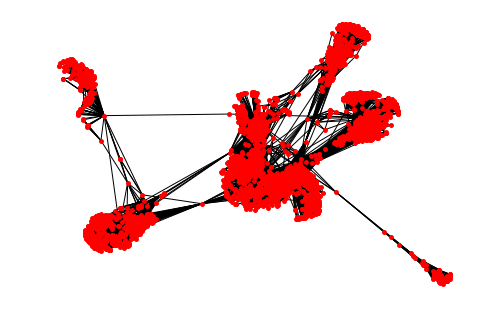

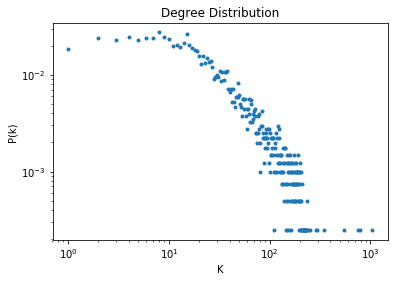

Calculating best minimal value for power law fit
C:\Users\joel.s.almeida\AppData\Local\Continuum\anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
C:\Users\joel.s.almeida\AppData\Local\Continuum\anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


average degree=  43.69101262688784
alpha=  2.531484466048424   sigma=  0.04331692204898798    xmin=  48.0
clustering coeficient=  0.6055467186200876
average path length=  3.6925068496963913


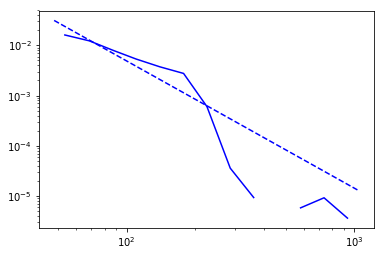

In [8]:
%matplotlib inline

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import collections as col
import powerlaw

with open('facebook_combined.csv', 'rb') as inf:
    next(inf, '')   # skip a line
    G = nx.read_edgelist(inf, delimiter=',', nodetype=int, encoding="utf-8")
    N = G.number_of_nodes()
    E = G.number_of_edges()
    
    nx.draw(G, node_size = 15)
    plt.show()
    
    average_degree = 2 * E / N
    clustering_coef = nx.average_clustering(G)
    average_path_length = nx.average_shortest_path_length(G)
    
    #transitivity = nx.transitivity(G)
    
    degree_sequence = sorted([d for n, d in G.degree()])  # degree sequence
    degreeCount = col.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    
    cnt_normalized = np.array(cnt) / N
    
    fig, ax = plt.subplots()
    plt.loglog(deg, cnt_normalized, marker='.', linestyle="None")
    
    plt.title("Degree Distribution")
    plt.ylabel("P(k)")
    plt.xlabel("K")
    
    plt.show()
    
    fit = powerlaw.Fit(np.array(degree_sequence)+1,discrete=True)
    fit.power_law.plot_pdf( color= 'b',linestyle='--',label='fit ccdf')
    fit.plot_pdf( color= 'b')
    
    print('average degree= ', average_degree)
    print('alpha= ',fit.power_law.alpha,'  sigma= ',fit.power_law.sigma, '   xmin= ', fit.power_law.xmin)
    print('clustering coeficient= ', clustering_coef)
    #print('transitivity= ', transitivity)
    print('average path length= ', average_path_length)
    

In [11]:
betweenness_centrality = nx.betweenness_centrality(G)
print('betweenness_centrality= ', betweenness_centrality)

betweenness_centrality=  {0: 0.14630592147442917, 1: 2.7832744209034606e-06, 2: 7.595021178512074e-08, 3: 1.6850656559280464e-06, 4: 1.8403320547933104e-07, 5: 2.205964164092193e-06, 6: 2.4537760730577472e-08, 7: 0.0001702984836730339, 8: 2.7604980821899654e-07, 9: 1.6454236303026905e-05, 10: 4.986739552037655e-08, 11: 0.0, 12: 0.0, 13: 1.7622717578436846e-06, 14: 5.582871686568508e-07, 15: 0.0, 16: 1.9979459275532697e-07, 17: 4.1066669000480344e-07, 18: 0.0, 19: 5.062957964075819e-06, 20: 6.793693332142838e-07, 21: 0.0009380243844653233, 22: 6.703002200833232e-07, 23: 6.860348937590618e-06, 24: 1.3673472422981514e-07, 25: 5.38808313945586e-05, 26: 1.935436798204632e-05, 27: 3.067220091322184e-08, 28: 3.812160659244892e-07, 29: 1.3954817951917517e-06, 30: 1.3694627409316544e-06, 31: 4.932641252790837e-06, 32: 0.0, 33: 0.0, 34: 0.0036020881281963652, 35: 0.0, 36: 2.726417858953052e-08, 37: 0.0, 38: 7.344481172858835e-07, 39: 9.548632622274015e-07, 40: 1.3796059569123122e-05, 41: 4.67327

In [24]:
import operator
sorted_bc = sorted(betweenness_centrality.items(), key=operator.itemgetter(1), reverse=True)
first = [i[0] for i in sorted_bc[0:4]]

[107, 1684, 3437, 1912]


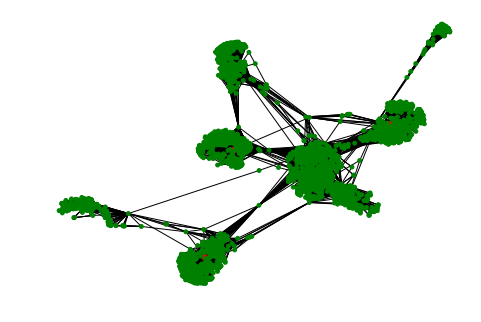

In [25]:
color_map = []
node_sizes = []

for node in G:
    if node =1912:
        color_map.append('red')
        node_sizes.append(30)
    else:
        color_map.append('green')
        node_sizes.append(15)
nx.draw(G,node_color = color_map, node_size = node_sizes)
plt.show()